# Step 1: Load Required Liabraries

In [84]:
import pandas as pd
import numpy as np
import requests
%matplotlib inline 
import matplotlib.pyplot as plt
import json
import os

# Step 2: Gather Data

### Step 2.1: Import Enhanced Twitter CSV File

In [85]:
twitter_arch = pd.read_csv('twitter-archive-enhanced.csv')

### Step 2.2: Download Tweet Image Predictions Programmatically

In [86]:
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response=requests.get(url)

with open('image-predictions.tsv',mode='wb') as file:
    file.write(response.content)
    
predicitions_df = pd.read_csv("image-predictions.tsv",sep='\t')

### Step 2.3: Get Tweets Data Using Twitter API

In [87]:
dataframe_list = []
with open ('tweet-json.txt') as file:
    for i in file:
        dataframe_list.append(json.loads(i))
        

In [88]:
tweets_data_df = pd.DataFrame(dataframe_list, columns = ['id', 'retweet_count', 'favorite_count'])

In [89]:
tweets_data_df.head()

id  retweet_count  favorite_count
0  892420643555336193           8853           39467
1  892177421306343426           6514           33819
2  891815181378084864           4328           25461
3  891689557279858688           8964           42908
4  891327558926688256           9774           41048

# Step 3: Assess Data

### Step 3.1: Assess Enhanced Twitter CSV File

In [90]:
twitter_arch.head(10)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   
5  891087950875897856                    NaN                  NaN   
6  890971913173991426                    NaN                  NaN   
7  890729181411237888                    NaN                  NaN   
8  890609185150312448                    NaN                  NaN   
9  890240255349198849                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   
5  2017-07-29 00:08:17 +0000   
6  2017-07-28 16:27:12 +0000   
7  2017-07-28 00:22:40 +0000   
8  2017-07-27 16:25:51 +0000   
9  2017-07-26 15:59:51 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   
5  <a href="http://twitter.com/download/iphone" r...   
6  <a href="http://twitter.com/download/iphone" r...   
7  <a href="http://twitter.com/download/iphone" r...   
8  <a href="http://twitter.com/download/iphone" r...   
9  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   
5  Here we have a majestic great white breaching ...                  NaN   
6  Meet Jax. He enjoys ice cream so much he gets ...                  NaN   
7  When you watch your owner call another dog a g...                  NaN   
8  This is Zoey. She doesn't want to be one of th...                  NaN   
9  This is Cassie. She is a college pup. Studying...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   
5                       NaN                        NaN   
6                       NaN                        NaN   
7                       NaN                        NaN   
8                       NaN                        NaN   
9                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   
5  https://twitter.com/dog_rates/status/891087950...                13   
6  https://gofundme.com/ydvmve-surgery-for-jax,ht...                13   
7  https://twitter.com/dog_rates/status/890729181...                13   
8  https://twitter.com/dog_rates/status/890609185...                13   
9  https://twitter.com/dog_rates/status/890240255...    

In [91]:
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [92]:
twitter_arch.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [93]:
twitter_arch.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
Oliver        11
Lola          10
Tucker        10
Penny         10
Bo             9
Winston        9
Sadie          8
the            8
Buddy          7
Bailey         7
Toby           7
an             7
Daisy          7
Dave           6
Rusty          6
Scout          6
Oscar          6
Koda           6
Stanley        6
Leo            6
Jack           6
Bella          6
Jax            6
Milo           6
Gus            5
            ... 
Kial           1
Georgie        1
Barclay        1
Harry          1
Kara           1
Hubertson      1
Dante          1
Noosh          1
Mitch          1
Yukon          1
Alfy           1
Barry          1
Pubert         1
Kayla          1
Molly          1
his            1
DayZ           1
Jarvis         1
Ridley         1
Mauve          1
Eleanor        1
Bones          1
Lilli          1
Cilantro       1
Ebby           1
Sweets         1
Fillup         1
Emanuel       

In [94]:
twitter_arch.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [95]:
twitter_arch.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [96]:
twitter_arch[twitter_arch ['rating_denominator'] == 0]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
313  835246439529840640           8.352460e+17           26259576.0   

                     timestamp  \
313  2017-02-24 21:54:03 +0000   

                                                source  \
313  <a href="http://twitter.com/download/iphone" r...   

                                                  text  retweeted_status_id  \
313  @jonnysun @Lin_Manuel ok jomny I know you're e...                  NaN   

     retweeted_status_user_id retweeted_status_timestamp expanded_urls  \
313                       NaN                        NaN           NaN   

     rating_numerator  rating_denominator  name doggo floofer pupper puppo  
313               960                   0  None  None    None   None  None

In [97]:
twitter_arch[twitter_arch ['rating_denominator'] != 10]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
313   835246439529840640           8.352460e+17         2.625958e+07   
342   832088576586297345           8.320875e+17         3.058208e+07   
433   820690176645140481                    NaN                  NaN   
516   810984652412424192                    NaN                  NaN   
784   775096608509886464                    NaN                  NaN   
902   758467244762497024                    NaN                  NaN   
1068  740373189193256964                    NaN                  NaN   
1120  731156023742988288                    NaN                  NaN   
1165  722974582966214656                    NaN                  NaN   
1202  716439118184652801                    NaN                  NaN   
1228  713900603437621249                    NaN                  NaN   
1254  710658690886586372                    NaN                  NaN   
1274  709198395643068416                    NaN                  NaN   
1351  704054845121142784                    NaN                  NaN   
1433  697463031882764288                    NaN                  NaN   
1598  686035780142297088           6.860340e+17         4.196984e+09   
1634  684225744407494656           6.842229e+17         4.196984e+09   
1635  684222868335505415                    NaN                  NaN   
1662  682962037429899265                    NaN                  NaN   
1663  682808988178739200           6.827884e+17         4.196984e+09   
1779  677716515794329600                    NaN                  NaN   
1843  675853064436391936                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   

                      timestamp  \
313   2017-02-24 21:54:03 +0000   
342   2017-02-16 04:45:50 +0000   
433   2017-01-15 17:52:40 +0000   
516   2016-12-19 23:06:23 +0000   
784   2016-09-11 22:20:06 +0000   
902   2016-07-28 01:00:57 +0000   
1068  2016-06-08 02:41:38 +0000   
1120  2016-05-13 16:15:54 +0000   
1165  2016-04-21 02:25:47 +0000   
1202  2016-04-03 01:36:11 +0000   
1228  2016-03-27 01:29:02 +0000   
1254  2016-03-18 02:46:49 +0000   
1274  2016-03-14 02:04:08 +0000   
1351  2016-02-28 21:25:30 +0000   
1433  2016-02-10 16:51:59 +0000   
1598  2016-01-10 04:04:10 +0000   
1634  2016-01-05 04:11:44 +0000   
1635  2016-01-05 04:00:18 +0000   
1662  2016-01-01 16:30:13 +0000   
1663  2016-01-01 06:22:03 +0000   
1779  2015-12-18 05:06:23 +0000   
1843  2015-12-13 01:41:41 +0000   
2335  2015-11-16 16:11:11 +0000   

                                                 source  \
313   <a href="http://twitter.com/download/iphone" r...   
342   <a href="http://twitter.com/download/iphone" r...   
433   <a href="http://twitter.com/download/iphone" r...   
516   <a href="http://twitter.com/download/iphone" r...   
784   <a href="http://twitter.com/download/iphone" r...   
902   <a href="http://twitter.com/download/iphone" r...   
1068  <a href="http://twitter.com/download/iphone" r...   
1120  <a href="http://twitter.com/download/iphone" r...   
1165  <a href="http://twitter.com/download/iphone" r...   
1202  <a href="http://twitter.com/download/iphone" r...   
1228  <a href="http://twitter.com/download/iphone" r...   
1254  <a href="http://twitter.com/download/iphone" r...   
1274  <a href="http://twitter.com/download/iphone" r...   
1351  <a href="http://twitter.com/download/iphone" r...   
1433  <a href="http://twitter.com/download/iphone" r...   
1598  <a href="http://twitter.com/download/iphone" r...   
1634  <a href="http://twitter.com/download/iphone" r...   
1635  <a href="http://twitter.com/download/iphone" r...   
1662  <a href="http://twitter.com/download/iphone" r...   
1663  <a href="http://twitter.com/download/iphone" r...   
1779  <a href="http://twitter.com/download/iphone" r...   
1843  <a href="http://twitter.com/download/iphone" r...   
2335  <a href="http://twitter.com/download/iphone" r...   

                             

### Step 3.2: Assess Image Predictions TSV File

In [98]:
predictions_df = pd.read_csv('image-predictions.tsv', sep = '\t')

In [99]:
predictions_df.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [100]:
predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [101]:
predictions_df.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

### Step 3.3: Assess Tweets Data From Twitter API

In [102]:
tweets_data_df.head(10)

id  retweet_count  favorite_count
0  892420643555336193           8853           39467
1  892177421306343426           6514           33819
2  891815181378084864           4328           25461
3  891689557279858688           8964           42908
4  891327558926688256           9774           41048
5  891087950875897856           3261           20562
6  890971913173991426           2158           12041
7  890729181411237888          16716           56848
8  890609185150312448           4429           28226
9  890240255349198849           7711           32467

In [103]:
tweets_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [104]:
tweets_data_df.isnull().any()

id                False
retweet_count     False
favorite_count    False
dtype: bool

### Step 3.4: Insights on data frames
#### * Quality issues:
##### "Enhanced Twitter Archive" -- twitter_arch data frame
- Change the "id" column label in tweets_data_df_cleaned to "tweets_id"
- tweet_id doesn't need to be an integer. Instead, it should be an object.
- There are 181 retweets which need to be eliminated.
- timestamp is an object which need to be converted into datetime.
- Row 313 has a dinominator of 0 which is invalid.
- Remove rows that doesn't contain images.

##### "Image Predictions Data" -- predictions_df data frame
- tweet_id is an integer which need to be converted into an object.

##### "Tweets Data From Twitter API" -- tweets_data data frame
- There are two rows missing in the data (2356 instead of 2354)

#### * Tidiness issues:
- dog stages are separated in four columns. (twitter_arch)
- The three data frames are correlated, so it's better to be combined into one data frame.

# Step 4: Clean Data

### Create Copies of the Data Frames

In [105]:
twitter_arch_cleaned = twitter_arch.copy()
predictions_df_cleaned = predictions_df.copy()
tweets_data_df_cleaned = tweets_data_df.copy()

In [106]:
twitter_arch_cleaned.head(3)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   

   rating_denominator     name doggo floofer pupper puppo  
0                  10  Phineas  None    None   None  None  
1                  10    Tilly  None    None   None  None  
2                  10   Archie  None    None   None  None

#### Quality Issue 1: Change the "id" column label in tweets_data_df_cleaned to "tweets_id" 

In [107]:
new_label = list(tweets_data_df_cleaned.columns)
new_label[0] = 'tweet_id'
tweets_data_df_cleaned.columns = new_label

In [108]:
tweets_data_df_cleaned.head(3)

tweet_id  retweet_count  favorite_count
0  892420643555336193           8853           39467
1  892177421306343426           6514           33819
2  891815181378084864           4328           25461

####  Tidiness Issue 1: Combine the three dataframes into one dataframe based on tweet ID

In [109]:
twitter_arch_cleaned = pd.merge(twitter_arch_cleaned, predictions_df_cleaned, on = 'tweet_id', how = 'left')

In [110]:
twitter_arch_cleaned = pd.merge(twitter_arch_cleaned, tweets_data_df_cleaned, on = 'tweet_id', how = 'left')

In [111]:
twitter_arch_cleaned.head(2)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   

                                       expanded_urls      ...         p1_conf  \
0  https://twitter.com/dog_rates/status/892420643...      ...        0.097049   
1  https://twitter.com/dog_rates/status/892177421...      ...        0.323581   

   p1_dog        p2   p2_conf p2_dog        p3   p3_conf p3_dog  \
0   False     bagel  0.085851  False    banana  0.076110  False   
1    True  Pekinese  0.090647   True  papillon  0.068957   True   

   retweet_count favorite_count  
0         8853.0        39467.0  
1         6514.0        33819.0  

[2 rows x 30 columns]

In [112]:
twitter_arch_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
jpg_url                       20

#### Tidiness Issue 2: Combine dog stages into one columns

In [113]:
twitter_arch_cleaned ['dog_stage'] = twitter_arch_cleaned ['text'].str.extract('(doggo|floofer|pupper|puppo)')
twitter_arch_cleaned.head(3)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   

                                       expanded_urls    ...     p1_dog  \
0  https://twitter.com/dog_rates/status/892420643...    ...      False   
1  https://twitter.com/dog_rates/status/892177421...    ...       True   
2  https://twitter.com/dog_rates/status/891815181...    ...       True   

         p2   p2_conf p2_dog        p3   p3_conf p3_dog retweet_count  \
0     bagel  0.085851  False    banana  0.076110  False        8853.0   
1  Pekinese  0.090647   True  papillon  0.068957   True        6514.0   
2  malamute  0.078253   True    kelpie  0.031379   True        4328.0   

   favorite_count dog_stage  
0         39467.0       NaN  
1         33819.0       NaN  
2         25461.0       NaN  

[3 rows x 31 columns]

In [114]:
twitter_arch_cleaned = twitter_arch_cleaned.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'])

In [115]:
twitter_arch_cleaned.head(3)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   

                                       expanded_urls    ...      p1_dog  \
0  https://twitter.com/dog_rates/status/892420643...    ...       False   
1  https://twitter.com/dog_rates/status/892177421...    ...        True   
2  https://twitter.com/dog_rates/status/891815181...    ...        True   

         p2   p2_conf p2_dog        p3   p3_conf  p3_dog retweet_count  \
0     bagel  0.085851  False    banana  0.076110   False        8853.0   
1  Pekinese  0.090647   True  papillon  0.068957    True        6514.0   
2  malamute  0.078253   True    kelpie  0.031379    True        4328.0   

  favorite_count  dog_stage  
0        39467.0        NaN  
1        33819.0        NaN  
2        25461.0        NaN  

[3 rows x 27 columns]

In [116]:
twitter_arch_cleaned['dog_stage'].value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_stage, dtype: int64

#### Quality Issue 2: Change tweet_id data type to object

In [117]:
twitter_arch_cleaned.tweet_id = twitter_arch_cleaned.tweet_id.astype(str)
twitter_arch_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
jpg_url                       2075 non-null object
img_num                       2075 non-null float64
p1                            2075 non-null object
p1_conf                       2075 non-null float64
p1_dog                       

#### Quality Issue 3: Remove Retweets from the Data Frame and any related columns

In [118]:
twitter_arch_cleaned = twitter_arch_cleaned[twitter_arch_cleaned['retweeted_status_id'].isnull()]
twitter_arch_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
jpg_url                       1994 non-null object
img_num                       1994 non-null float64
p1                            1994 non-null object
p1_conf                       1994 non-null float64
p1_dog                        1994 

In [119]:
twitter_arch_cleaned = twitter_arch_cleaned.drop(columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'])
twitter_arch_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog                   1994 non-null object
p3                       1994 non-null object
p3_conf             

#### Quality Issue 4: Change timestamp data type into datetime

In [120]:
twitter_arch_cleaned.timestamp = pd.to_datetime(twitter_arch_cleaned.timestamp)
twitter_arch_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog                   1994 non-null object
p3                       1994 non-null object
p3_conf     

#### Quality Issue 5: Replace the rating denimonator of row 313 from 0 to 10  

In [121]:
twitter_arch_cleaned.at[313, 'rating_denominator'] = 10

In [122]:
twitter_arch_cleaned [twitter_arch_cleaned ['rating_denominator'] == 0]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog, retweet_count, favorite_count, dog_stage]
Index: []

[0 rows x 24 columns]

#### Quality Issue 6: Remove rows that doesn't contain images

In [123]:
twitter_arch_cleaned.jpg_url.isnull().any()

True

In [124]:
twitter_arch_cleaned = twitter_arch_cleaned [twitter_arch_cleaned.jpg_url.notnull()]
twitter_arch_cleaned.jpg_url.isnull().any()

False

#### Quality Issue 7: "tweet_id" in prediction_df_cleaned need to be an object

In [125]:
predictions_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [126]:
predictions_df_cleaned.tweet_id = predictions_df_cleaned.tweet_id.astype(str)
predictions_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [127]:
twitter_arch_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog                   1994 non-null object
p3                       1994 non-null object
p3_conf     

#### Quality Issue 8: Two rows missing in the data (tweets_data_df) 

Already removed when combining data frames and revoming rows with no images

# Step 5: Store Data

In [128]:
twitter_arch_cleaned.to_csv('my_twitter_archive.csv', index = False)

# Step 6: Analyze & Visualize Data

### Step 6.1: Different percentages of dog stages

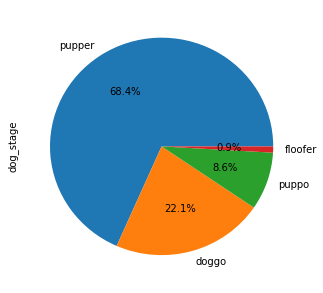

In [129]:
twitter_arch_cleaned['dog_stage'].value_counts().plot(kind = 'pie', figsize =(5,5), autopct='%1.1f%%');

#### The pie chart above shows the percentages of dog stages
#### Insights:
- Pupper forms more than half of the chart with 68.4%
- Floofer is the lowest stage among all with only 0.9%

### Step 6.2: The relationship between retweet count and favorite tweet count

TypeError: 'str' object is not callable

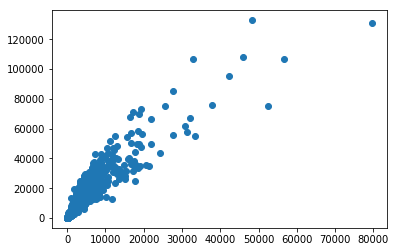

In [141]:
plt.scatter(twitter_arch_cleaned['retweet_count'], twitter_arch_cleaned['favorite_count']);
plt.title("Retweet Count VS Favorite Count")
plt.xlabel('Retweet Count', fontsize = 8)
plt.ylabel('Favorite Count', fontsize = 8)